In [1450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

In [1451]:
df=pd.read_csv("Titanic.csv")
test=pd.read_csv("test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1452]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1453]:
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0


In [1454]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [1455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [1456]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1457]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [1458]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mean())

In [1459]:
df['Cabin'].fillna('Unknown', inplace=True)


In [1460]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [1461]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,0.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,0.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,0.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,0.0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,1.0,1


In [1462]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1463]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [1464]:
test["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

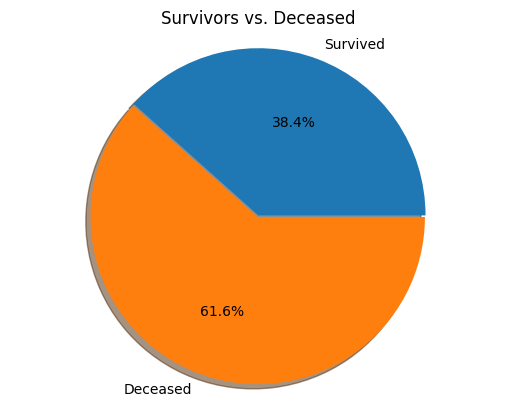

In [1465]:
import matplotlib.pyplot as plt

survived_counts = [342, 549]  

plt.pie(survived_counts, labels=["Survived", "Deceased"], autopct="%1.1f%%", shadow=True, explode=[0, 0.01])

plt.axis('equal')

plt.title("Survivors vs. Deceased")

plt.show()


In [1466]:

df['Alone'] = df['SibSp'] + df['Parch'] <= 0

def extract_title(name):
    return name.split(',')[1].strip().split('.')[0]

test['Title'] = test['Name'].apply(extract_title)


test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [1467]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

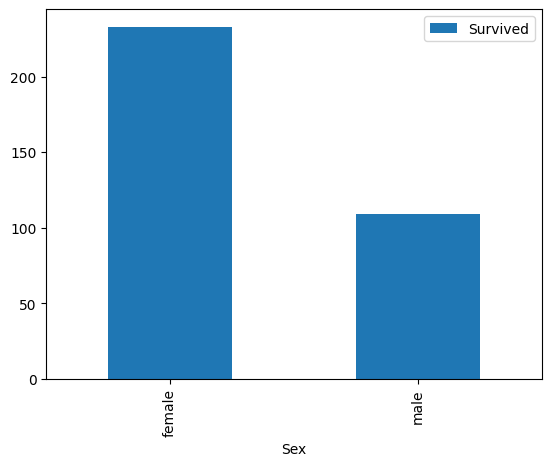

In [1468]:

test[['Sex', 'Survived']].groupby(['Sex']).sum().plot.bar()




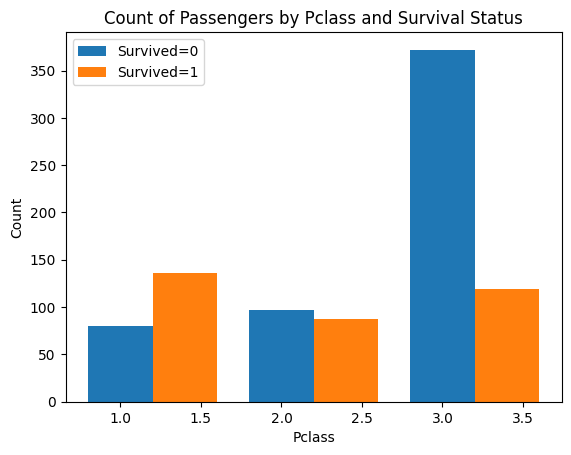

In [1469]:
import pandas as pd
import matplotlib.pyplot as plt

pclass_counts = (
    df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack(fill_value=0).fillna(0)
)

pclass_labels = pclass_counts.index
bar_width = 0.8 / len(pclass_counts.columns)

for i, (survived, counts) in enumerate(pclass_counts.items()):
    offset = i * bar_width
    plt.bar(pclass_labels + offset, counts, width=bar_width, label=f"Survived={survived}")

plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Count of Passengers by Pclass and Survival Status")
plt.legend()
plt.show()


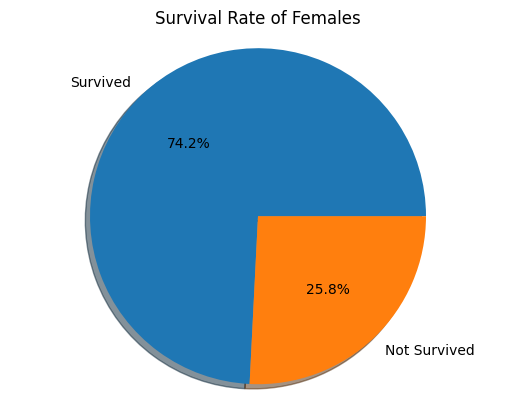

In [1470]:
import pandas as pd
from matplotlib import pyplot as plt

# Assuming you have loaded your DataFrame 'df'

# Filter females (assuming 'Sex' is encoded or 'female' is the string value)
females = df[df['Sex'] == 'female']  # Assuming 'female' is the string value

# Count females who survived and didn't survive
female_survived = females['Survived'].sum()
female_not_survived = len(females) - female_survived  # Alternative calculation

# Improved pie chart labels (avoid quotes if 'Survived' is a boolean column)
pie_chart_labels = ["Survived", "Not Survived"]

# Create the pie chart
plt.pie([female_survived, female_not_survived], labels=pie_chart_labels, autopct="%1.1f%%", shadow=True)
plt.title("Survival Rate of Females")  # Consistent capitalization
plt.axis('equal')

plt.show()


number of males survived: 109
number of males not survived: 468


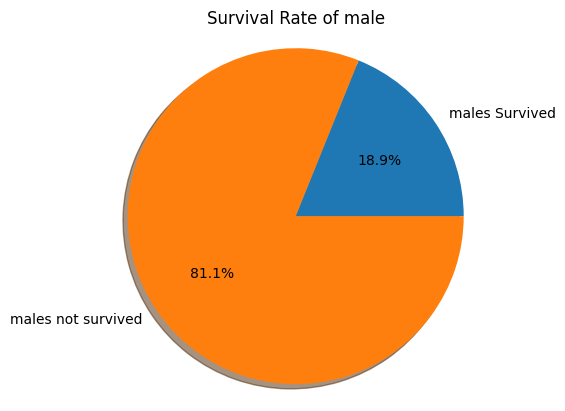

In [1471]:
males_survived= (df[df['Sex'] == "male"]["Survived"]==1).sum()
males_not_survived=(df[df['Sex'] == "male"]["Survived"]==0).sum()
print("number of males survived:", males_survived)
print("number of males not survived:", males_not_survived)
pie_chart_labels = ["males Survived", "males not survived"]


plt.pie([males_survived, males_not_survived], labels=pie_chart_labels, autopct="%1.1f%%", shadow=True)
plt.title("Survival Rate of male")
plt.axis('equal')  

plt.show()


In [1472]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,0.0,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1.0,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,0.0,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0.0,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,0.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,0.0,1,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,0.0,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,0.0,4,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,1.0,1,True


In [1473]:
X=df.drop(columns=["PassengerId","Name","Ticket","Sex","Cabin","Alone"],axis=1)
y=df["Survived"]

In [1474]:
print(X)

     Survived  Pclass        Age  SibSp  Parch     Fare  Embarked  FamilySize
0           0       3  22.000000      1      0   7.2500       0.0           2
1           1       1  38.000000      1      0  71.2833       1.0           2
2           1       3  26.000000      0      0   7.9250       0.0           1
3           1       1  35.000000      1      0  53.1000       0.0           2
4           0       3  35.000000      0      0   8.0500       0.0           1
..        ...     ...        ...    ...    ...      ...       ...         ...
886         0       2  27.000000      0      0  13.0000       0.0           1
887         1       1  19.000000      0      0  30.0000       0.0           1
888         0       3  29.699118      1      2  23.4500       0.0           4
889         1       1  26.000000      0      0  30.0000       1.0           1
890         0       3  32.000000      0      0   7.7500       2.0           1

[891 rows x 8 columns]


In [1475]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1476]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


In [1477]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [1478]:
X_prediction=model.predict(X_train)

In [1479]:
X_test_pred=model.predict(X_test)
print(X_test_pred)

[1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1]


In [1480]:
Accuracy=accuracy_score(y_test,X_test_pred)
print(Accuracy)

0.7988826815642458
